In [22]:
import gpxpy

import pandas as pd

import matplotlib

from pytz import timezone

from utils import (
    init_postgis, 
    get_location_error, 
    crop_route, 
    get_total_distance,
    get_gpx_df,
    plot_map,
    plot_location_error,
    plot_elevation,
)

In [23]:
matplotlib.rcParams['timezone'] = 'Asia/Singapore'

In [24]:
input_dir = f"../singapore/benjamin-sheares-bridge"

In [25]:
start_location = (1.309743979078668, 103.89449080743935)
stop_location = (1.309743979078668, 103.89449080743935)

In [26]:
init_postgis('gpx_route', input_dir + '/route.gpx')
init_postgis('glonass', input_dir + '/glonass.gpx')
init_postgis('galileo', input_dir + '/galileo.gpx')
init_postgis('qzss', input_dir + '/qzss.gpx')

In [27]:
glonass_df = get_location_error('glonass')
glonass_df = crop_route(glonass_df, start_location, stop_location, 200)
glonass_df.head(3)

time  latitude   longitude  distance_to_route  \
0 2024-05-27 06:20:47.641000+08:00  1.309432  103.894385           8.506505   
1 2024-05-27 06:20:48.641000+08:00  1.309440  103.894357           6.876010   
2 2024-05-27 06:20:49.642000+08:00  1.309445  103.894325           5.520462   

   start_distance  stop_distance  
0       36.485946      36.485946  
1       36.778371      36.778371  
2       37.860815      37.860815

In [28]:
galileo_df = get_location_error('galileo')
galileo_df = crop_route(galileo_df, start_location, stop_location, 200)
galileo_df.head(3)

time  latitude   longitude  distance_to_route  \
0 2024-06-27 22:01:23.692000+08:00  1.309485  103.894632          23.594221   
1 2024-06-27 22:01:24.692000+08:00  1.309478  103.894620          22.436821   
2 2024-06-27 22:01:25.692000+08:00  1.309472  103.894605          20.960953   

   start_distance  stop_distance  
0       32.646771      32.646771  
1       32.704171      32.704171  
2       32.682594      32.682594

In [29]:
qzss_df = get_location_error('qzss')
qzss_df = crop_route(qzss_df, start_location, stop_location, 200)
qzss_df.head(3)

time  latitude   longitude  distance_to_route  \
0 2024-06-26 22:08:55.439000+08:00  1.309428  103.894555          17.734088   
1 2024-06-26 22:08:56.440000+08:00  1.309423  103.894547          17.293914   
2 2024-06-26 22:08:57.440000+08:00  1.309420  103.894540          16.935502   

   start_distance  stop_distance  
0       35.626482      35.626482  
1       35.996657      35.996657  
2       36.239849      36.239849

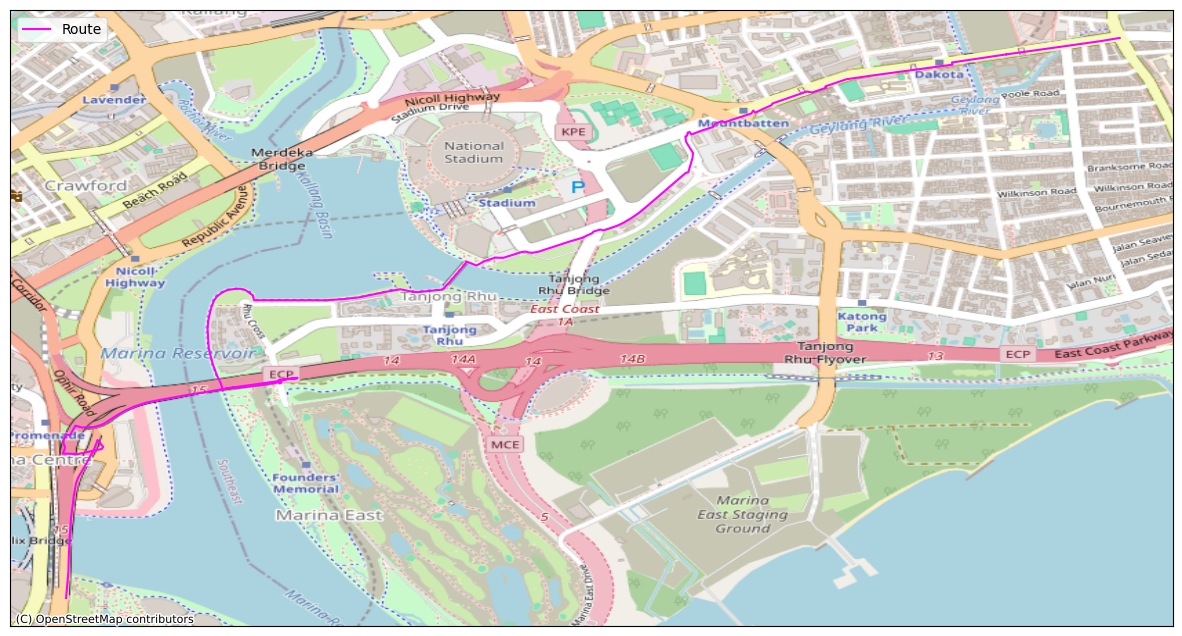

In [30]:
route_df = get_gpx_df(input_dir + '/route.gpx')
plot_map(route_df, 'magenta', 'Route')

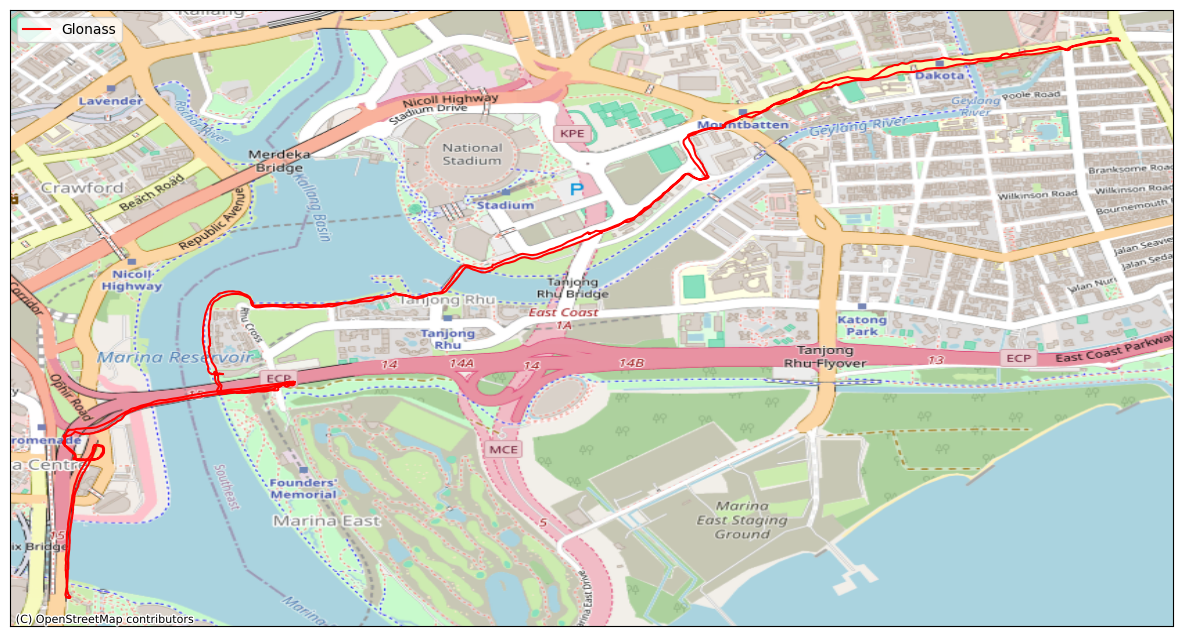

In [31]:
plot_map(glonass_df, 'red', 'Glonass')

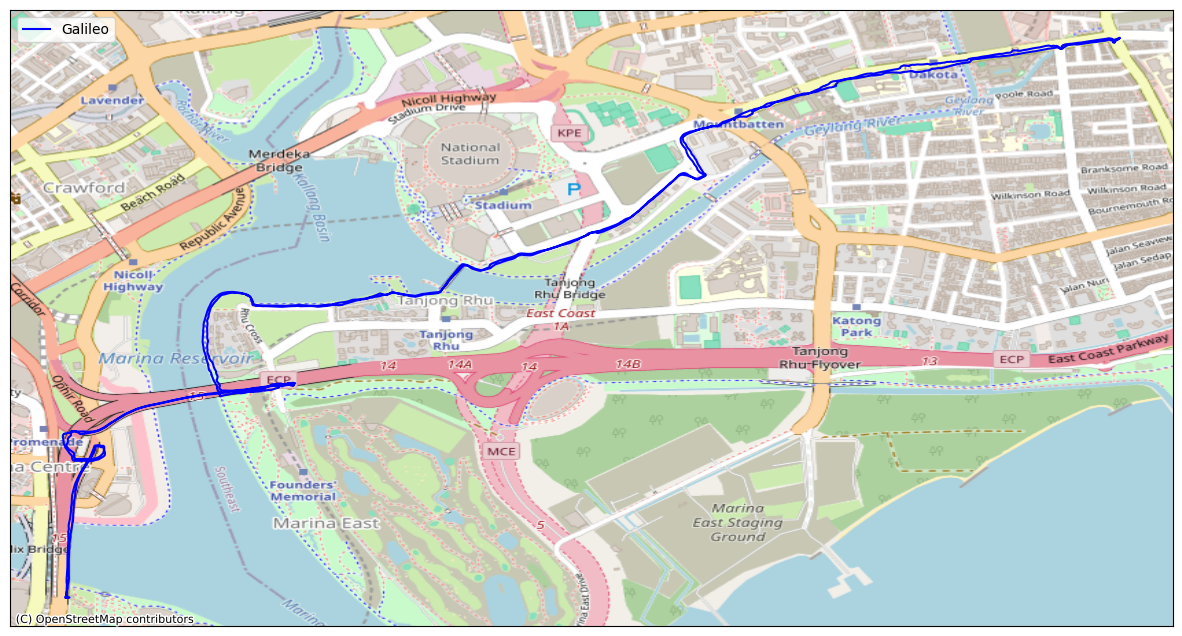

In [32]:
plot_map(galileo_df, 'blue', 'Galileo')

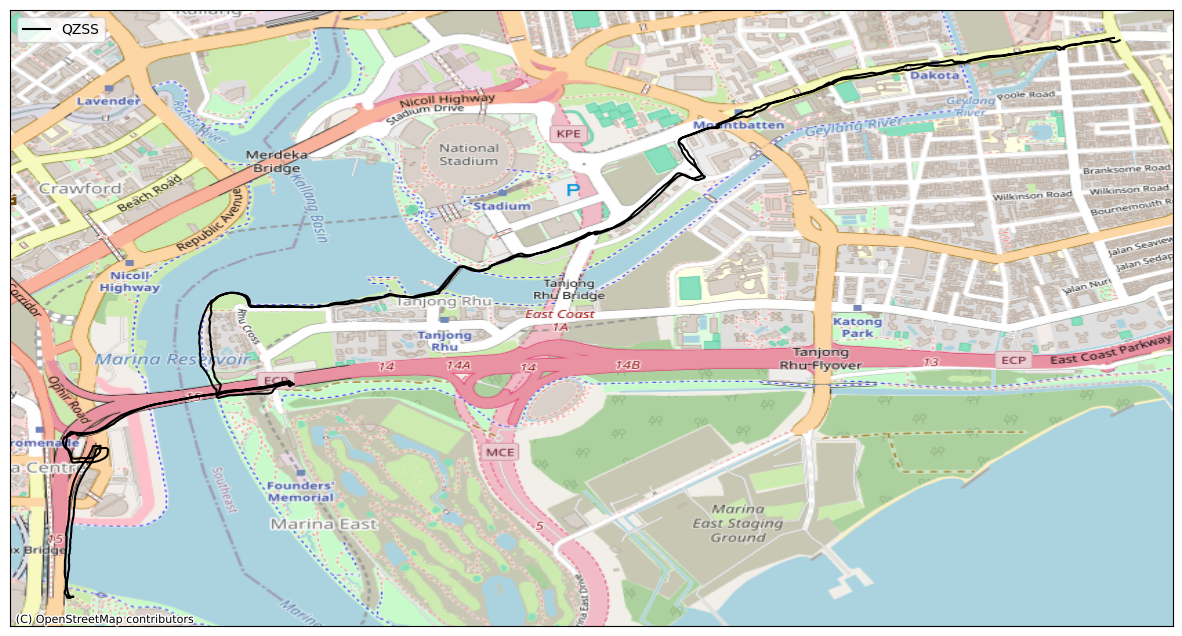

In [33]:
plot_map(qzss_df, 'black', 'QZSS')

In [34]:
desc_glonass_df = glonass_df['distance_to_route'].describe().to_frame()
desc_glonass_df.columns = ['Glonass']

desc_galileo_df = galileo_df['distance_to_route'].describe().to_frame()
desc_galileo_df.columns = ['Galileo']

desc_qzss_df = qzss_df['distance_to_route'].describe().to_frame()
desc_qzss_df.columns = ['QZSS']

merged_desc = pd.concat([desc_glonass_df, desc_galileo_df, desc_qzss_df], axis=1)
merged_desc.to_csv('/tmp/merged_desc.csv')

print(merged_desc)

           Glonass      Galileo         QZSS
count  4578.000000  4899.000000  4377.000000
mean      9.315520     7.692576     9.045498
std       9.461413     8.686682     9.395890
min       0.003895     0.001662     0.000094
25%       3.108597     2.898778     2.786991
50%       7.172844     5.503762     6.365157
75%      12.123799     9.174618    11.460970
max      73.797204    76.570247    74.318731


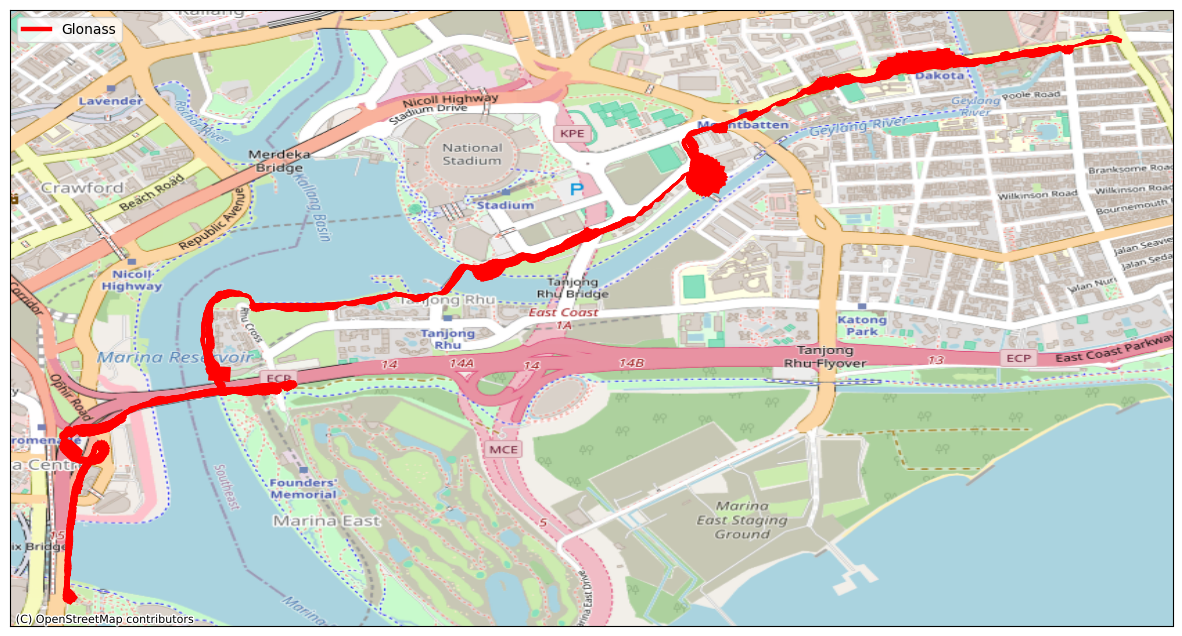

In [35]:
plot_location_error(glonass_df, 'red', 'Glonass')

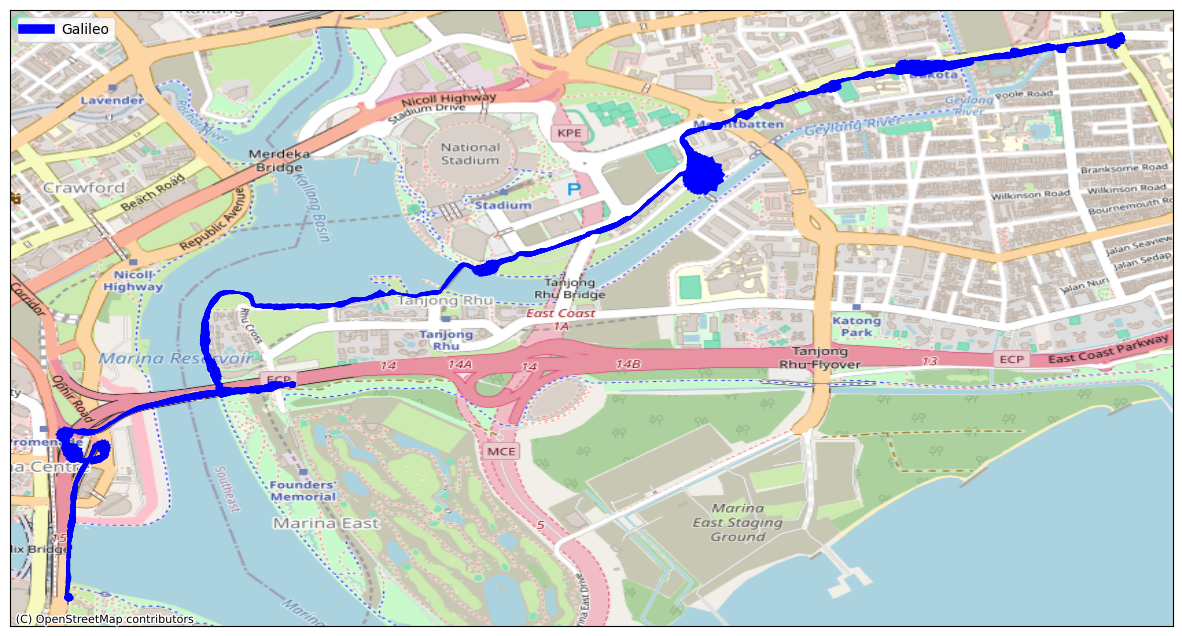

In [36]:
plot_location_error(galileo_df, 'blue', 'Galileo')

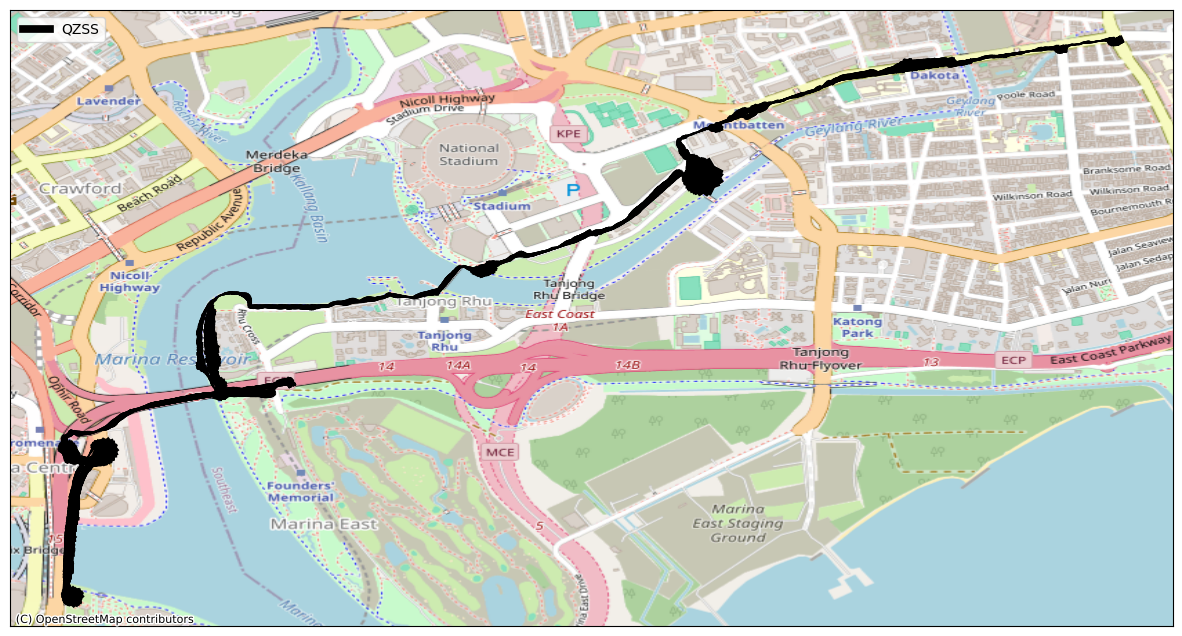

In [37]:
plot_location_error(qzss_df, 'black', 'QZSS')

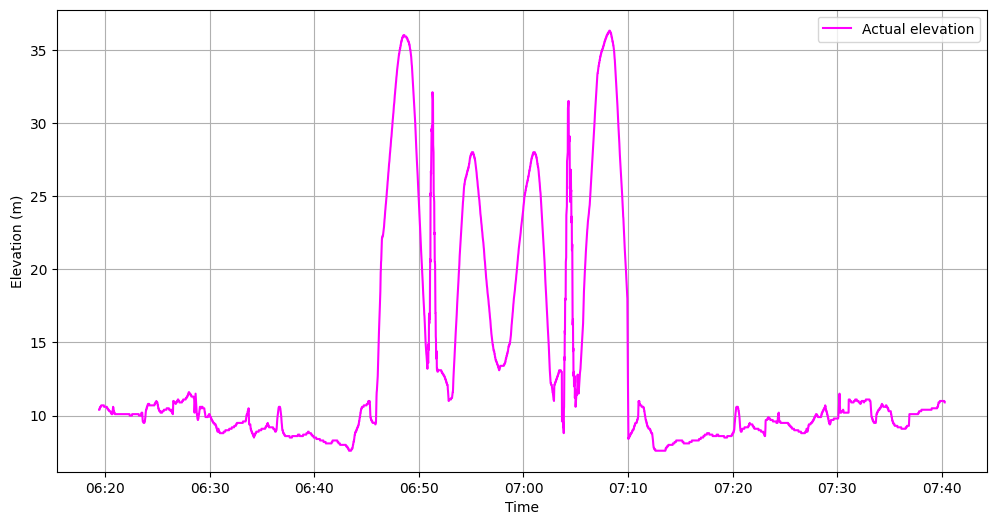

In [38]:
elevation_df = get_gpx_df(input_dir + '/elevation.gpx')
glonass_df = get_gpx_df(input_dir + '/glonass.gpx')
galileo_df = get_gpx_df(input_dir + '/galileo.gpx')
qzss_df = get_gpx_df(input_dir + '/qzss.gpx')

plot_elevation(elevation_df, 'magenta', 'Actual elevation')

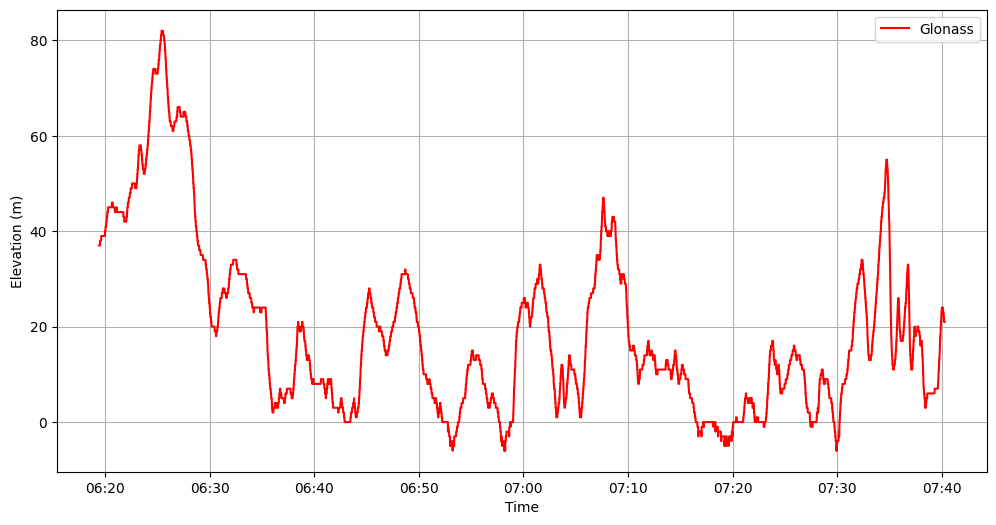

In [39]:
plot_elevation(glonass_df, 'red', 'Glonass')

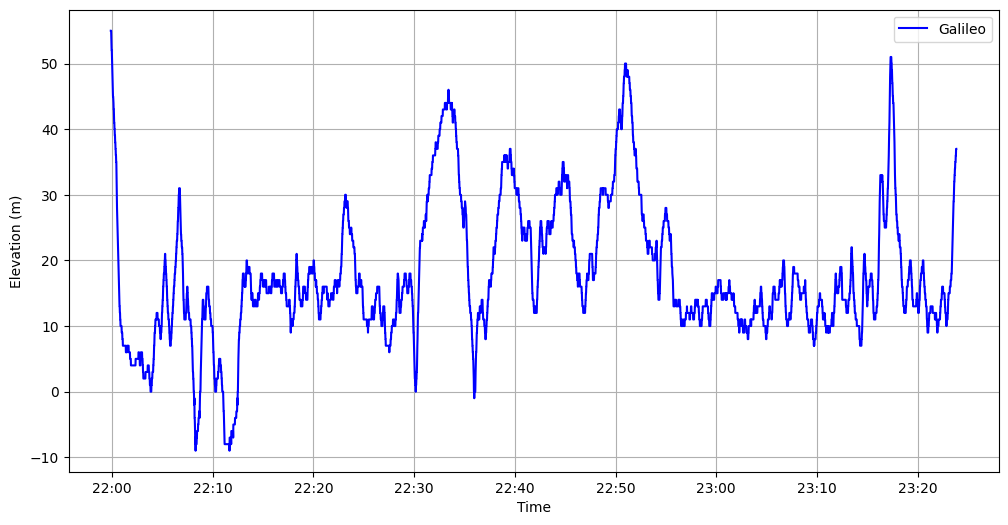

In [40]:
plot_elevation(galileo_df, 'blue', 'Galileo')

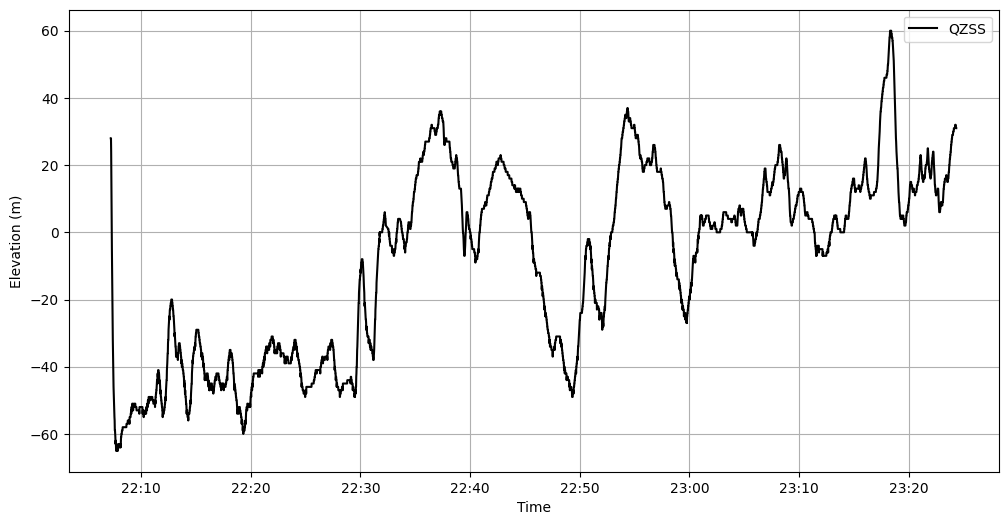

In [41]:
plot_elevation(qzss_df, 'black', 'QZSS')